In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

In [11]:
data_3D7 = pd.read_csv('../Data/in_vitro/slideReadings/3D7.csv')
groups_3D7 = pd.read_csv('../Data/in_vitro/slideReadings/Groups_3D7.csv')

data_FUP = pd.read_csv('../Data/in_vitro/slideReadings/FUP.csv')
groups_FUP = pd.read_csv('../Data/in_vitro/slideReadings/Groups_FUP.csv')

In [12]:
data_3D7 = data_3D7.melt(id_vars=['HPI'], var_name='Sample', value_name='Relative abundance')
data_FUP = data_FUP.melt(id_vars=['HPI'], var_name='Sample', value_name='Relative abundance')
experiment_3D7 = data_3D7.merge(groups_3D7[['sampleName', 'Genotype', 'Donor', 'Stage']], left_on='Sample', right_on='sampleName', how='inner')
experiment_FUP = data_FUP.merge(groups_FUP[['sampleName', 'Genotype', 'Donor', 'Stage']], left_on='Sample', right_on='sampleName', how='inner')
experiment_3D7['Strain'] = '3D7'
experiment_FUP['Strain'] = 'FUP'
exp = experiment_3D7.append(experiment_FUP)

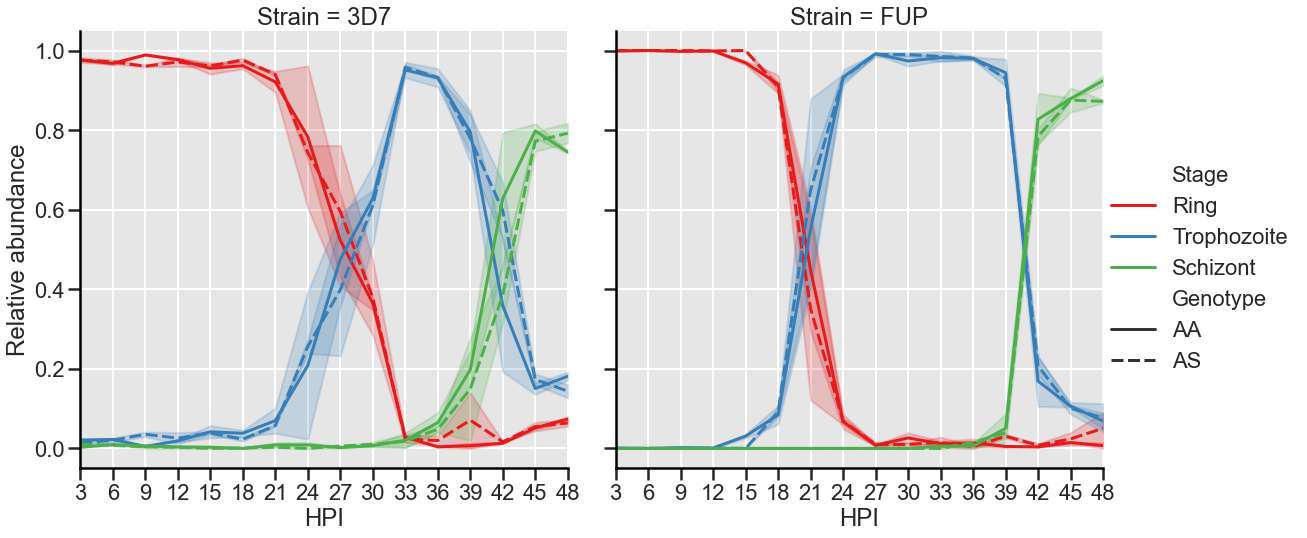

In [16]:
sns.set_context('poster')
sns.set_style("darkgrid", {"axes.facecolor": ".9", 'axes.edgecolor': '0', 'xtick.bottom': True, 'ytick.left': True})
ax = sns.relplot(
    data=exp,
    x='HPI', 
    y='Relative abundance', 
    height=8,
    hue= 'Stage',
    kind = 'line',
    col='Strain',
    palette = 'Set1',
    style='Genotype'
    )
ax.set(xlim=(3,48),xticks=[3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48])